<a href="https://colab.research.google.com/github/Anisafi/UASJST/blob/main/skema_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

In [5]:
# Melakukan import library-library yang dibutuhkan oleh program
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

# Mengimpor dataset dengan format CSV
df=pd.read_csv("/content/drive/MyDrive/uas_jst/kelompok 5/dataset covid 1/Data.csv")

# Mencetak jumlah baris dan kolom serta menampilkan sampel data
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (94, 4)


,Tanggal,Positif,Sembuh,Meninggal
0,3/1/2020,0,0,0
1,3/2/2020,0,0,0
2,3/3/2020,3,0,1
3,3/4/2020,3,0,1
4,3/5/2020,7,0,3


In [6]:
# Menentukan data Covid-19 untuk training sejumlah 66 baris dan 1 kolom
training_set = df.iloc[:66, 1:2].values
training_set.shape

(66, 1)

In [7]:
# Proses feature scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Membuat prediksi dengan 5 time-steps
X_train = []
y_train = []
for i in range(15, 66):
    X_train.append(training_set_scaled[i-15:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(51, 15, 1)

In [8]:
# Mulai melakukan pemrosesan RNN
model = Sequential()
# Menambah layer RNN yang pertama dan Dropout regularisation
model.add(SimpleRNN(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Menambah layer RNN yang kedua dan Dropout regularisation
model.add(SimpleRNN(units = 100, return_sequences = True))
model.add(Dropout(0.2))
# Menambah layer RNN yang ketiga dan Dropout regularisation
model.add(SimpleRNN(units = 100, return_sequences = True))
model.add(Dropout(0.2))
# Menambah layer RNN yang keempat dan Dropout regularisation
model.add(SimpleRNN(units = 100))
model.add(Dropout(0.2))
# Menambahkan output layer
model.add(Dense(units = 1))
# Melihat rancangan RNN kita
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 15, 100)             │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 15, 100)             │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 15, 100)             │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 15, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,601 (275.79 KB)

 Trainable params: 70,601 (275.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Melakukan compile RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Menjalankan RNN ke Training set
history = model.fit(X_train, y_train, epochs = 300, batch_size = 1)

Epoch 1/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.5900
Epoch 2/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4773
Epoch 3/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6256
Epoch 4/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3494
Epoch 5/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4641
Epoch 6/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3492
Epoch 7/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3561
Epoch 8/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4089
Epoch 9/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4010
Epoch 10/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2513
Epoch 11/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1861
Epoch 12/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2706
Epoch 13/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3254
Epoch 14/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2791
Epoch 15/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2375
Epoc

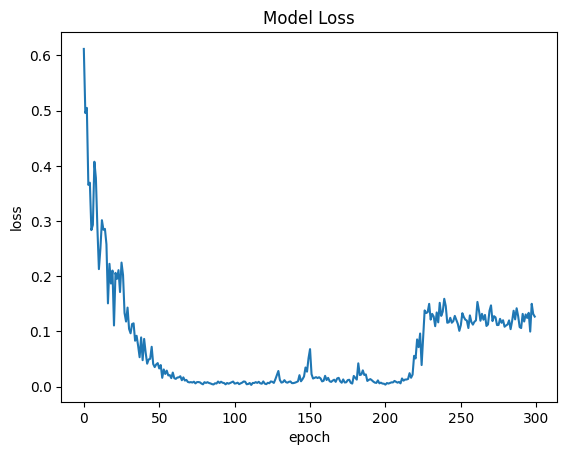

In [10]:
# Menampilkan grafik Model Loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [11]:
# Menentukan data Covid-19 untuk test menggunakan sisa data
dataset_train = df.iloc[:66, 1:2]
dataset_test = df.iloc[66:, 1:2]

# Melakukan prediksi kasus Covid-19
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 5:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(5, 33):
    X_test.append(inputs[i-5:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(dataset_test.values.shape)

(28, 1)


In [12]:
prediction = model.predict(X_test)
prediction = sc.inverse_transform(prediction)
print(prediction.astype(int))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step
[[1120]
 [1120]
 [1120]
 [1120]
 [1120]
 [1120]
 [1120]
 [1120]
 [1120]
 [1120]
 [1120]
 [1120]
 [1120]
 [1120]
 [1120]
 [1120]
 [1120]
 [1120]
 [1119]
 [1119]
 [1119]
 [1119]
 [1119]
 [1119]
 [1119]
 [1119]
 [1119]
 [1119]]


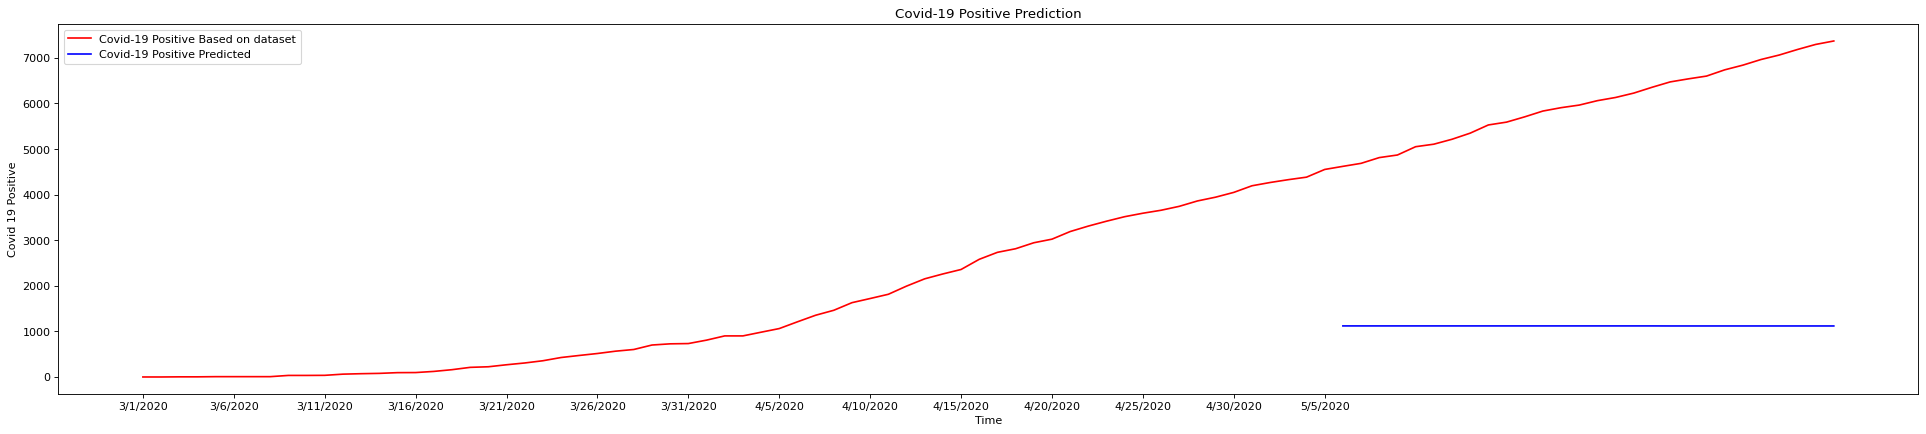

In [13]:
# Visualisasi perbandingan hasil prediksi dan data sesunguhnya
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df.loc[:, 'Tanggal'],dataset_total.values, color = 'red', label = 'Covid-19 Positive Based on dataset')
plt.plot(df.loc[66:, 'Tanggal'],prediction.astype(int), color = 'blue', label = 'Covid-19 Positive Predicted')
plt.xticks(np.arange(0,66,5))
plt.title('Covid-19 Positive Prediction')
plt.xlabel('Time')
plt.ylabel('Covid 19 Positive')
plt.legend()
plt.show()

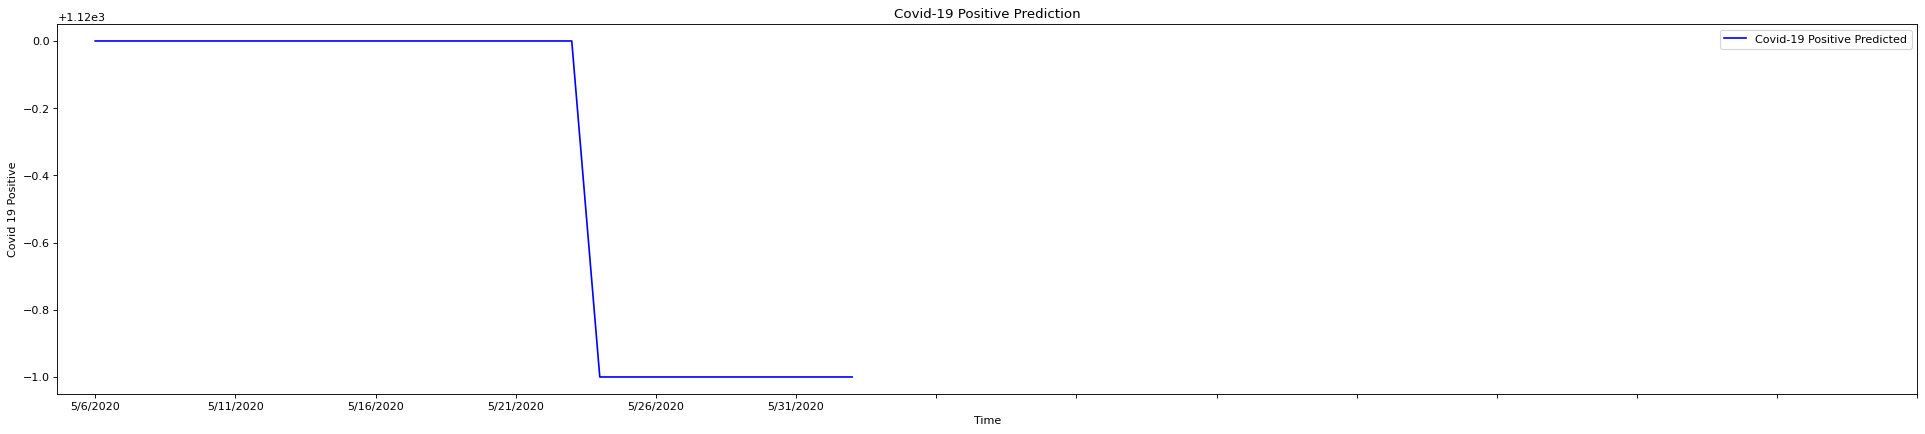

In [14]:
# Visualisasi hasil prediksi
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df.loc[66:, 'Tanggal'],prediction.astype(int), color = 'blue', label = 'Covid-19 Positive Predicted')
plt.xticks(np.arange(0,66,5))
plt.title('Covid-19 Positive Prediction')
plt.xlabel('Time')
plt.ylabel('Covid 19 Positive')
plt.legend()
plt.show()